<a href="https://colab.research.google.com/github/Indhresen/1/blob/main/Electric_Vehicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 New Section - Credit to Souce -
 https://jovian.com/sunithapachala93/eda-project-electric-vehicle

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import scipy

In [ ]:
df = pd.read_csv('evdataset (1) (2).csv')


In [ ]:
df

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1116,Porsche,https://ev-database.org/car/1116/Porsche-Tayca...,390,290,340,560,370,450,2.8,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,1533,Volkswagen,https://ev-database.org/car/1533/Volkswagen-ID...,440,320,380,660,415,515,7.9,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,1547,Citroen,https://ev-database.org/car/1547/Citroen-e-Ber...,210,140,170,295,170,220,11.7,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,1492,Audi,https://ev-database.org/car/1492/Audi-Q4-Sport...,395,290,340,580,370,460,6.2,...,49,500,4588,1865,1614,2764,2715,575,535,5


In [ ]:
# Display the first few rows
print(df.head(30))

# Get an overview of the data
print(df.info(30))

# Generate descriptive statistics
print(df.describe())

      id        Make                                               link  \
0   1647     Genesis  https://ev-database.org/car/1647/Genesis-GV60-...   
1   1493    Mercedes  https://ev-database.org/car/1493/Mercedes-EQB-...   
2   1229     Porsche  https://ev-database.org/car/1229/Porsche-Tayca...   
3   1252         BMW   https://ev-database.org/car/1252/BMW-i4-eDrive40   
4   1534  Volkswagen  https://ev-database.org/car/1534/Volkswagen-ID...   
5   1178       CUPRA  https://ev-database.org/car/1178/CUPRA-Born-11...   
6   1279       Skoda  https://ev-database.org/car/1279/Skoda-Enyaq-i...   
7   1438     Porsche  https://ev-database.org/car/1438/Porsche-Tayca...   
8   1281       Skoda  https://ev-database.org/car/1281/Skoda-Enyaq-i...   
9   1625     Porsche  https://ev-database.org/car/1625/Porsche-Tayca...   
10  1280       Skoda  https://ev-database.org/car/1280/Skoda-Enyaq-i...   
11  1475          MG  https://ev-database.org/car/1475/MG-Marvel-R-P...   
12  1421       Volvo  htt

In [ ]:
## read headers
print (df.columns)

## read each column
print(df[['Make', 'Charge Speed', 'Battery Capacity','Charge Power','Acceleration 0 - 100 km/h','Top Speed','Electric Range','Total Power']])

Index(['id', 'Make', 'link', 'City - Cold Weather', 'Highway - Cold Weather',
       'Combined - Cold Weather', 'City - Mild Weather',
       'Highway - Mild Weather', 'Combined - Mild Weather',
       'Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range',
       'Total Power', 'Total Torque', 'Drive', 'Battery Capacity',
       'Charge Power', 'Charge Speed', 'Fastcharge Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross Vehicle Weight (GVWR)', 'Max. Payload',
       'Cargo Volume', 'Seats'],
      dtype='object')
           Make  Charge Speed  Battery Capacity  Charge Power  \
0       Genesis            49              77.4          11.0   
1      Mercedes            46              69.7          11.0   
2       Porsche            46              93.4          11.0   
3           BMW            54              83.9          11.0   
4    Volkswagen            55              82.0          11.0   
..          ...           ...               ...           ...   
189   

###The table you provided contains descriptive statistics for the variables listed in the columns. Here's an explanation of the different statistics:

Count: The number of observations available for each variable. In this case, there are 194 observations for each variable.

Mean: The average value of each variable across all observations. It represents the central tendency of the data.

Standard Deviation (Std): A measure of the dispersion or spread of the data. It quantifies how much the values deviate from the mean.

Minimum (Min): The smallest value observed for each variable.

25th Percentile (25%): Also known as the first quartile, it represents the value below which 25% of the data falls.

Median (50%): The middle value of the data when sorted in ascending order. It separates the lower 50% from the upper 50% of the data.

75th Percentile (75%): Also known as the third quartile, it represents the value below which 75% of the data falls.

Maximum (Max): The largest value observed for each variable.

These statistics provide information about the distribution, central tendency, and spread of the data. They can help you understand the range of values, the typical value, and the degree of variability for each variable. For example, you can see the average value (mean) and the range of values (min and max) for variables like "Electric Range," "Top Speed," and "Acceleration 0-100 km/h."

##The correlation table you provided shows the correlation coefficients between various features or variables in a dataset. Correlation coefficients measure the strength and direction of the linear relationship between two variables. Here's a step-by-step explanation:

Correlation Coefficients: Each cell in the table represents the correlation coefficient between two variables. The correlation coefficient ranges from -1 to 1, where -1 indicates a strong negative correlation, 0 indicates no correlation, and 1 indicates a strong positive correlation.

Positive and Negative Correlation: A positive correlation coefficient indicates that as one variable increases, the other variable also tends to increase. Conversely, a negative correlation coefficient indicates that as one variable increases, the other variable tends to decrease.

Magnitude of Correlation: The magnitude of the correlation coefficient indicates the strength of the relationship. Values closer to -1 or 1 represent a stronger correlation, while values closer to 0 represent a weaker correlation.

Interpretation of Correlation Coefficients: The correlation coefficients in the table provide insights into the relationships between different features. For example:

Features with correlation coefficients close to 1 or -1 have a strong positive or negative linear relationship. This means that as one feature increases, the other feature also increases or decreases correspondingly.
Features with correlation coefficients close to 0 indicate little to no linear relationship. This means that changes in one feature are not associated with predictable changes in the other feature.
Using Correlation for Analysis: Correlation analysis helps understand how different variables in the dataset are related to each other. It can be useful for identifying patterns, dependencies, and potential cause-effect relationships between variables. For example, a positive correlation between "Electric Range" and "City - Cold Weather" suggests that electric vehicles with a longer electric range tend to perform better in cold weather conditions.

In [ ]:
# To view Corrlation
df.corr().style.background_gradient(cmap='cividis')

<ipython-input-13-ed28bda3a0e0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='cividis')


,id,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Total Power,Total Torque,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
id,1.000000,0.148643,0.125678,0.133956,0.132667,0.117581,0.122418,-0.016639,0.001646,0.128289,0.000215,0.076902,0.150453,-0.025375,-0.069925,-0.006527,0.144799,0.092202,0.132081,0.207595,0.127113,-0.006921,0.009927,0.106599
City - Cold Weather,0.148643,1.000000,0.993877,0.997671,0.995403,0.989605,0.992702,-0.687348,0.690191,0.995611,0.634454,0.617320,0.892994,0.387061,0.379922,0.681541,0.258353,0.315336,-0.482570,0.106606,0.316749,-0.333713,-0.104651,-0.456558
Highway - Cold Weather,0.125678,0.993877,1.000000,0.998745,0.995948,0.998854,0.998701,-0.713855,0.717689,0.999215,0.651659,0.628120,0.867167,0.396209,0.410197,0.709545,0.234153,0.291067,-0.545106,0.070969,0.281990,-0.365036,-0.138673,-0.501088
Combined - Cold Weather,0.133956,0.997671,0.998745,1.000000,0.997390,0.996644,0.997891,-0.706070,0.708448,0.999298,0.645064,0.623857,0.877135,0.393639,0.400040,0.701283,0.241118,0.299863,-0.522741,0.082223,0.294072,-0.354403,-0.128335,-0.485633
City - Mild Weather,0.132667,0.995403,0.995948,0.997390,1.000000,0.995482,0.998164,-0.694927,0.683766,0.998262,0.609190,0.584918,0.849622,0.403178,0.426630,0.682200,0.192315,0.248088,-0.534071,0.041454,0.240715,-0.387497,-0.152617,-0.501402
Highway - Mild Weather,0.117581,0.989605,0.998854,0.996644,0.995482,1.000000,0.999207,-0.716631,0.715785,0.998401,0.641822,0.615397,0.846901,0.399403,0.426898,0.712565,0.208880,0.264448,-0.567585,0.046288,0.251309,-0.385029,-0.159389,-0.518491
Combined - Mild Weather,0.122418,0.992702,0.998701,0.997891,0.998164,0.999207,1.000000,-0.708977,0.703094,0.999340,0.628609,0.603153,0.847982,0.401656,0.428057,0.701561,0.201721,0.257352,-0.554953,0.042971,0.246900,-0.387039,-0.156062,-0.512409
Acceleration 0 - 100 km/h,-0.016639,-0.687348,-0.713855,-0.706070,-0.694927,-0.716631,-0.708977,1.000000,-0.872495,-0.708172,-0.836703,-0.784717,-0.568002,-0.398855,-0.405163,-0.711806,0.009513,-0.220777,0.738645,0.239264,-0.054268,0.557870,0.407173,0.726934
Top Speed,0.001646,0.690191,0.717689,0.708448,0.683766,0.715785,0.703094,-0.872495,1.000000,0.706707,0.922050,0.829415,0.664636,0.316146,0.284501,0.825455,0.244581,0.440627,-0.676073,-0.006390,0.251085,-0.328184,-0.215861,-0.597254
Electric Range,0.128289,0.995611,0.999215,0.999298,0.998262,0.998401,0.999340,-0.708172,0.706707,1.000000,0.637401,0.614073,0.863062,0.398395,0.415019,0.701595,0.219826,0.277975,-0.540106,0.061227,0.269258,-0.373626,-0.145220,-0.500843


In [ ]:
# to view the statistical values of numerical columns
df.describe().style.background_gradient(cmap='cividis')

,id,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Total Power,Total Torque,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,1526.257732,343.247423,247.500000,293.144330,502.706186,315.721649,393.608247,7.870619,177.015464,345.592784,209.525773,447.690722,74.059278,10.151546,44.396907,528.711340,4702.087629,1880.061856,1620.706186,2899.829897,2633.139175,619.257732,507.190722,5.536082
std,154.958947,92.173078,75.553656,84.558652,138.297461,98.967440,117.054175,3.168385,38.110213,101.384377,122.939481,222.221421,20.122679,2.754238,15.617918,256.219808,378.219208,68.719346,152.249425,238.567154,415.592250,199.938995,192.411664,1.530768
min,1116.000000,135.000000,95.000000,115.000000,210.000000,125.000000,160.000000,2.800000,125.000000,135.000000,33.000000,125.000000,23.800000,6.600000,24.000000,150.000000,3631.000000,1622.000000,1378.000000,2322.000000,1300.000000,245.000000,171.000000,4.000000
25%,1437.250000,280.000000,185.000000,230.000000,395.000000,230.000000,295.000000,5.400000,150.000000,265.000000,100.000000,260.000000,55.750000,7.400000,34.000000,312.500000,4469.750000,1837.000000,1519.750000,2764.000000,2310.000000,497.000000,405.000000,5.000000
50%,1557.500000,350.000000,250.000000,300.000000,515.000000,320.000000,400.000000,7.400000,160.000000,352.500000,160.000000,350.000000,75.000000,11.000000,46.000000,470.000000,4694.000000,1887.000000,1614.000000,2900.000000,2660.000000,572.500000,472.500000,5.000000
75%,1648.750000,403.750000,295.000000,345.000000,595.000000,375.000000,470.000000,9.650000,200.000000,410.000000,300.000000,603.750000,83.900000,11.000000,51.750000,650.000000,4959.000000,1920.750000,1652.000000,3082.500000,2968.750000,645.000000,558.250000,5.000000
max,1757.000000,595.000000,470.000000,535.000000,895.000000,615.000000,740.000000,19.100000,261.000000,640.000000,560.000000,1100.000000,120.000000,22.000000,110.000000,1170.000000,5391.000000,2011.000000,1927.000000,3430.000000,3500.000000,1121.000000,1410.000000,9.000000


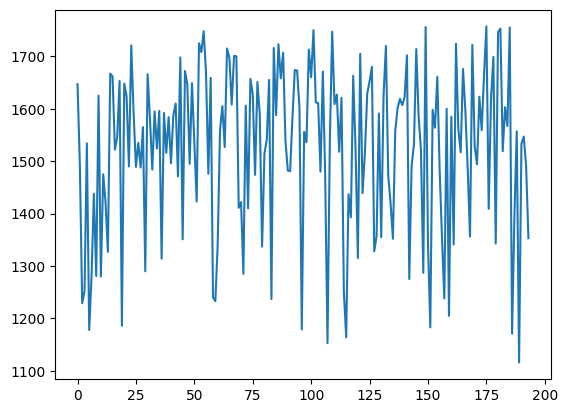

In [ ]:
plt.plot(df.index, df.id)
plt.show()

In [ ]:
import numpy as np
ind = np.arange(10)
x1 = [8, 10, 11, 9, 10, 12, 13, 12, 14, 11]
x2 = [7.5, 9, 9.5, 11, 13, 13.5, 14, 14.5, 13, 13.5]

In [ ]:
ind

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

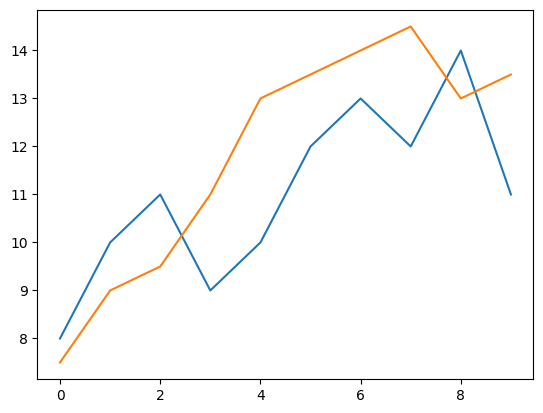

In [ ]:
plt.plot(ind, x1)
plt.plot(ind, x2)
plt.show()

In [ ]:
# Drop irrelevant columns
df = df.drop(['id', 'link'], axis=1)

In [ ]:
df

,Make,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,Genesis,390,275,330,575,355,445,7.8,185,390,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,Mercedes,330,235,280,480,300,375,6.2,160,330,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,Porsche,400,305,350,580,385,470,3.2,260,415,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,BMW,445,340,390,670,440,540,5.7,190,470,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,Volkswagen,440,320,380,660,415,520,7.9,160,450,...,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Porsche,390,290,340,560,370,450,2.8,260,400,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,Volkswagen,440,320,380,660,415,515,7.9,160,450,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,Citroen,210,140,170,295,170,220,11.7,135,195,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,Audi,395,290,340,580,370,460,6.2,180,400,...,49,500,4588,1865,1614,2764,2715,575,535,5


In [ ]:
# Handle missing values if any
df = df.dropna()

In [ ]:
df


,Make,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,Genesis,390,275,330,575,355,445,7.8,185,390,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,Mercedes,330,235,280,480,300,375,6.2,160,330,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,Porsche,400,305,350,580,385,470,3.2,260,415,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,BMW,445,340,390,670,440,540,5.7,190,470,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,Volkswagen,440,320,380,660,415,520,7.9,160,450,...,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Porsche,390,290,340,560,370,450,2.8,260,400,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,Volkswagen,440,320,380,660,415,515,7.9,160,450,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,Citroen,210,140,170,295,170,220,11.7,135,195,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,Audi,395,290,340,580,370,460,6.2,180,400,...,49,500,4588,1865,1614,2764,2715,575,535,5


In [ ]:
# Convert data types if needed
df['Electric Range'] = df['Electric Range'].astype(float)
df['Acceleration 0 - 100 km/h'] = df['Acceleration 0 - 100 km/h'].astype(float)

In [ ]:
df

,Make,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,Genesis,390,275,330,575,355,445,7.8,185,390.0,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,Mercedes,330,235,280,480,300,375,6.2,160,330.0,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,Porsche,400,305,350,580,385,470,3.2,260,415.0,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,BMW,445,340,390,670,440,540,5.7,190,470.0,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,Volkswagen,440,320,380,660,415,520,7.9,160,450.0,...,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Porsche,390,290,340,560,370,450,2.8,260,400.0,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,Volkswagen,440,320,380,660,415,515,7.9,160,450.0,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,Citroen,210,140,170,295,170,220,11.7,135,195.0,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,Audi,395,290,340,580,370,460,6.2,180,400.0,...,49,500,4588,1865,1614,2764,2715,575,535,5


In [ ]:
# Identify relevant columns for analysis
relevant_columns = ['Make', 'Electric Range', 'Acceleration 0 - 100 km/h', 'Top Speed', 'Battery Capacity']

In [ ]:
df

,Make,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,Genesis,390,275,330,575,355,445,7.8,185,390.0,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,Mercedes,330,235,280,480,300,375,6.2,160,330.0,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,Porsche,400,305,350,580,385,470,3.2,260,415.0,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,BMW,445,340,390,670,440,540,5.7,190,470.0,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,Volkswagen,440,320,380,660,415,520,7.9,160,450.0,...,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Porsche,390,290,340,560,370,450,2.8,260,400.0,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,Volkswagen,440,320,380,660,415,515,7.9,160,450.0,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,Citroen,210,140,170,295,170,220,11.7,135,195.0,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,Audi,395,290,340,580,370,460,6.2,180,400.0,...,49,500,4588,1865,1614,2764,2715,575,535,5


In [ ]:
relevant_columns

['Make',
 'Electric Range',
 'Acceleration 0 - 100 km/h',
 'Top Speed',
 'Battery Capacity']

In [ ]:
df

,Make,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,Genesis,390,275,330,575,355,445,7.8,185,390.0,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,Mercedes,330,235,280,480,300,375,6.2,160,330.0,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,Porsche,400,305,350,580,385,470,3.2,260,415.0,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,BMW,445,340,390,670,440,540,5.7,190,470.0,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,Volkswagen,440,320,380,660,415,520,7.9,160,450.0,...,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Porsche,390,290,340,560,370,450,2.8,260,400.0,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,Volkswagen,440,320,380,660,415,515,7.9,160,450.0,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,Citroen,210,140,170,295,170,220,11.7,135,195.0,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,Audi,395,290,340,580,370,460,6.2,180,400.0,...,49,500,4588,1865,1614,2764,2715,575,535,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Make                         194 non-null    object 
 1   City - Cold Weather          194 non-null    int64  
 2   Highway - Cold Weather       194 non-null    int64  
 3   Combined - Cold Weather      194 non-null    int64  
 4   City - Mild Weather          194 non-null    int64  
 5   Highway - Mild Weather       194 non-null    int64  
 6   Combined - Mild Weather      194 non-null    int64  
 7   Acceleration 0 - 100 km/h    194 non-null    float64
 8   Top Speed                    194 non-null    int64  
 9   Electric Range               194 non-null    float64
 10  Total Power                  194 non-null    int64  
 11  Total Torque                 194 non-null    int64  
 12  Drive                        194 non-null    object 
 13  Battery Capacity    

In [ ]:
filtered_df = df[df['City - Cold Weather'] > 10]

In [ ]:
filtered_df

,Make,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,Genesis,390,275,330,575,355,445,7.8,185,390.0,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,Mercedes,330,235,280,480,300,375,6.2,160,330.0,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,Porsche,400,305,350,580,385,470,3.2,260,415.0,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,BMW,445,340,390,670,440,540,5.7,190,470.0,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,Volkswagen,440,320,380,660,415,520,7.9,160,450.0,...,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Porsche,390,290,340,560,370,450,2.8,260,400.0,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,Volkswagen,440,320,380,660,415,515,7.9,160,450.0,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,Citroen,210,140,170,295,170,220,11.7,135,195.0,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,Audi,395,290,340,580,370,460,6.2,180,400.0,...,49,500,4588,1865,1614,2764,2715,575,535,5


In [ ]:
filtered_data = df[df['Make'].isin(['Genesis', 'Mercedes', 'Porsche', 'BMW', 'Volkswagen'])]

In [ ]:
print(filtered_data)
print(filtered_data.shape)

           Make  City - Cold Weather  Highway - Cold Weather  \
0       Genesis                  390                     275   
1      Mercedes                  330                     235   
2       Porsche                  400                     305   
3           BMW                  445                     340   
4    Volkswagen                  440                     320   
..          ...                  ...                     ...   
182         BMW                  420                     315   
187     Porsche                  450                     345   
188  Volkswagen                  420                     305   
189     Porsche                  390                     290   
190  Volkswagen                  440                     320   

     Combined - Cold Weather  City - Mild Weather  Highway - Mild Weather  \
0                        330                  575                     355   
1                        280                  480                     300   


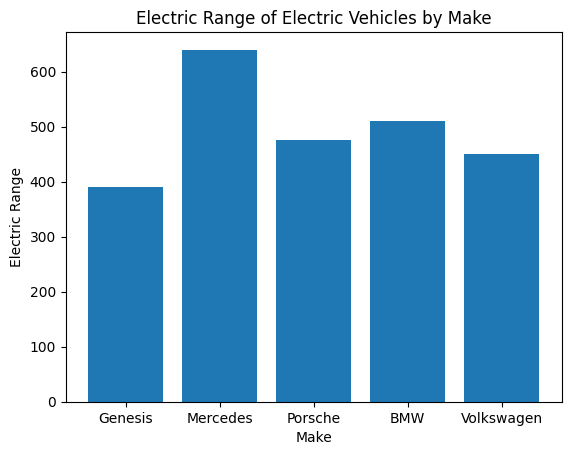

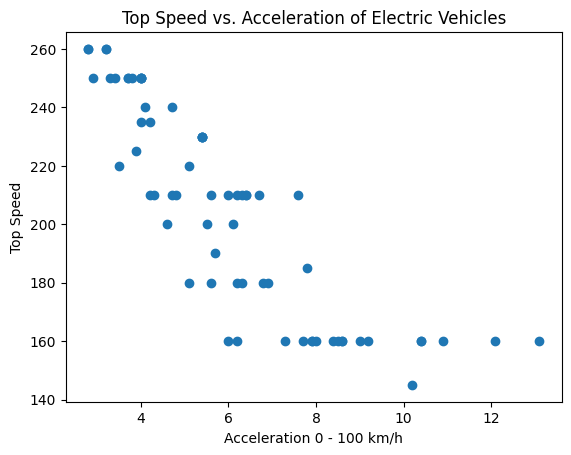

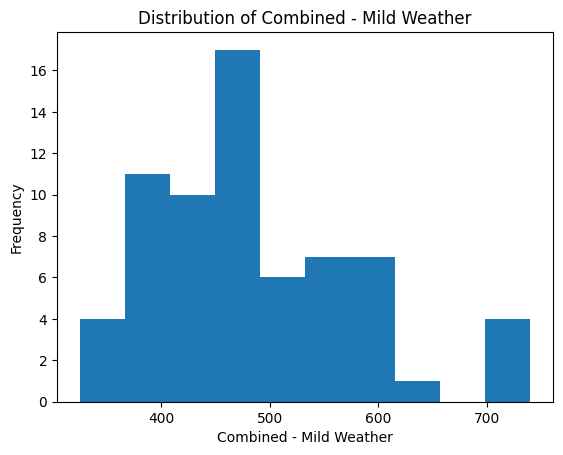

In [ ]:
# Bar plot
plt.bar(filtered_data['Make'], filtered_data['Electric Range'])
plt.xlabel('Make')
plt.ylabel('Electric Range')
plt.title('Electric Range of Electric Vehicles by Make')
plt.show()

# Scatter plot
plt.scatter(filtered_data['Acceleration 0 - 100 km/h'], filtered_data['Top Speed'])
plt.xlabel('Acceleration 0 - 100 km/h')
plt.ylabel('Top Speed')
plt.title('Top Speed vs. Acceleration of Electric Vehicles')
plt.show()

# Histogram
plt.hist(filtered_data['Combined - Mild Weather'], bins=10)
plt.xlabel('Combined - Mild Weather')
plt.ylabel('Frequency')
plt.title('Distribution of Combined - Mild Weather')
plt.show()

In [ ]:
# Calculate mean values for selected variables
range_comparison = filtered_data.groupby(['Make'])['Electric Range'].mean()
acceleration_comparison = filtered_data.groupby(['Make'])['Acceleration 0 - 100 km/h'].mean()
top_speed_comparison = filtered_data.groupby(['Make'])['Top Speed'].mean()
battery_capacity_comparison = filtered_data.groupby(['Make'])['Battery Capacity'].mean()


In [ ]:
print("Electric Range Comparison:")
print(range_comparison)
print()

print("Acceleration Comparison:")
print(acceleration_comparison)
print()

print("Top Speed Comparison:")
print(top_speed_comparison)
print()

print("Battery Capacity Comparison:")
print(battery_capacity_comparison)


Electric Range Comparison:
Make
BMW           438.125000
Genesis       371.250000
Mercedes      456.041667
Porsche       416.111111
Volkswagen    387.692308
Name: Electric Range, dtype: float64

Acceleration Comparison:
Make
BMW           5.150000
Genesis       5.375000
Mercedes      6.695833
Porsche       4.022222
Volkswagen    8.484615
Name: Acceleration 0 - 100 km/h, dtype: float64

Top Speed Comparison:
Make
BMW           208.125000
Genesis       213.750000
Mercedes      192.083333
Porsche       245.555556
Volkswagen    163.461538
Name: Top Speed, dtype: float64

Battery Capacity Comparison:
Make
BMW           90.050000
Genesis       77.400000
Mercedes      96.545833
Porsche       90.244444
Volkswagen    76.307692
Name: Battery Capacity, dtype: float64


In [ ]:
# Calculate mode values for selected variables
range_comparison = filtered_data.groupby(['Make'])['Electric Range'].mean()
acceleration_comparison = filtered_data.groupby(['Make'])['Acceleration 0 - 100 km/h'].mean()
top_speed_comparison = filtered_data.groupby(['Make'])['Top Speed'].mean()
battery_capacity_comparison = filtered_data.groupby(['Make'])['Battery Capacity'].mean()

In [ ]:
print("Electric Range Comparison:")
print(range_comparison)
print()

print("Acceleration Comparison:")
print(acceleration_comparison)
print()

print("Top Speed Comparison:")
print(top_speed_comparison)
print()

print("Battery Capacity Comparison:")
print(battery_capacity_comparison)


Electric Range Comparison:
Make
BMW           438.125000
Genesis       371.250000
Mercedes      456.041667
Porsche       416.111111
Volkswagen    387.692308
Name: Electric Range, dtype: float64

Acceleration Comparison:
Make
BMW           5.150000
Genesis       5.375000
Mercedes      6.695833
Porsche       4.022222
Volkswagen    8.484615
Name: Acceleration 0 - 100 km/h, dtype: float64

Top Speed Comparison:
Make
BMW           208.125000
Genesis       213.750000
Mercedes      192.083333
Porsche       245.555556
Volkswagen    163.461538
Name: Top Speed, dtype: float64

Battery Capacity Comparison:
Make
BMW           90.050000
Genesis       77.400000
Mercedes      96.545833
Porsche       90.244444
Volkswagen    76.307692
Name: Battery Capacity, dtype: float64


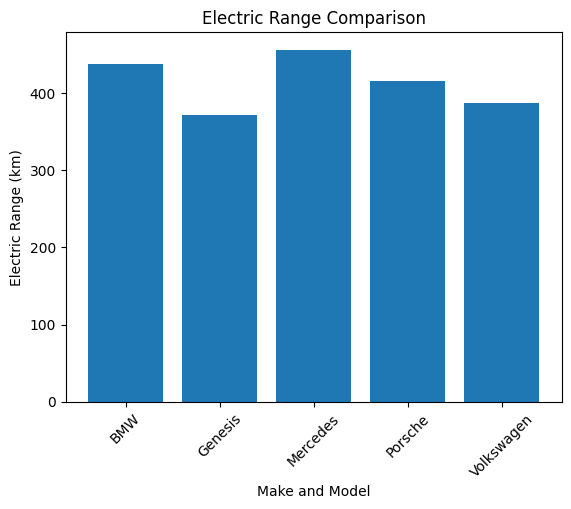

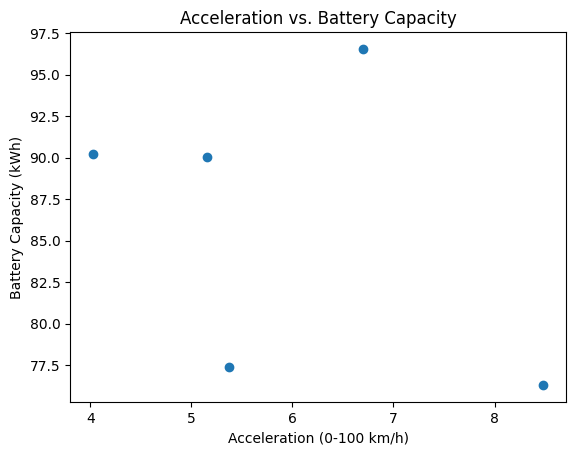

In [ ]:
# Bar plot for electric range comparison
plt.bar(range_comparison.index, range_comparison.values)
plt.xlabel('Make and Model')
plt.ylabel('Electric Range (km)')
plt.title('Electric Range Comparison')
plt.xticks(rotation=45)
plt.show()

# Scatter plot for acceleration and battery capacity
plt.scatter(acceleration_comparison, battery_capacity_comparison)
plt.xlabel('Acceleration (0-100 km/h)')
plt.ylabel('Battery Capacity (kWh)')
plt.title('Acceleration vs. Battery Capacity')
plt.show()

##The analysis conducted is as a comparative analysis of electric vehicles based on factors such as electric range, acceleration, top speed, and battery capacity.

##Electric Range Comparison:

•	BMW has an average electric range of 438.125 km.
•	Genesis has an average electric range of 371.250 km.
•	Mercedes has an average electric range of 456.041 km.
•	Porsche has an average electric range of 416.111 km.
•	Volkswagen has an average electric range of 387.692 km.

**Acceleration Comparison:**
•	BMW has an average acceleration time of 5.150 seconds.
•	Genesis has an average acceleration time of 5.375 seconds.
•	Mercedes has an average acceleration time of 6.695 seconds.
•	Porsche has an average acceleration time of 4.022 seconds.
•	Volkswagen has an average acceleration time of 8.484 seconds.

**Top Speed Comparison:**
•	BMW has an average top speed of 208.125 km/h.
•	Genesis has an average top speed of 213.750 km/h.
•	Mercedes has an average top speed of 192.083 km/h.
•	Porsche has an average top speed of 245.555 km/h.
•	Volkswagen has an average top speed of 163.461 km/h.

**Battery Capacity Comparison:**
•	BMW has an average battery capacity of 90.050 kWh.
•	Genesis has an average battery capacity of 77.400 kWh.
•	Mercedes has an average battery capacity of 96.545 kWh.
•	Porsche has an average battery capacity of 90.244 kWh.
•	Volkswagen has an average battery capacity of 76.307 kWh.

Based on these comparisons, it can be concluded that:

•	Mercedes offers the highest average electric range, making it suitable for longer-distance travel.
•	Porsche demonstrates the best acceleration performance among the considered makes.
•	Porsche also has the highest top speed, indicating its capability for high-speed driving.
•	Mercedes has the largest battery capacity, ensuring a longer driving range.


### Electric Range Comparison


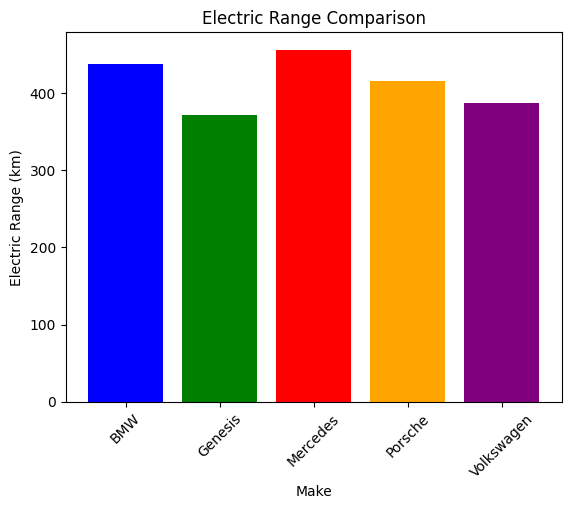

In [ ]:
plt.bar(range_comparison.index, range_comparison.values, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.xlabel('Make')
plt.ylabel('Electric Range (km)')
plt.title('Electric Range Comparison')
plt.xticks(rotation=45)
plt.show()

### Acceleration Comparison

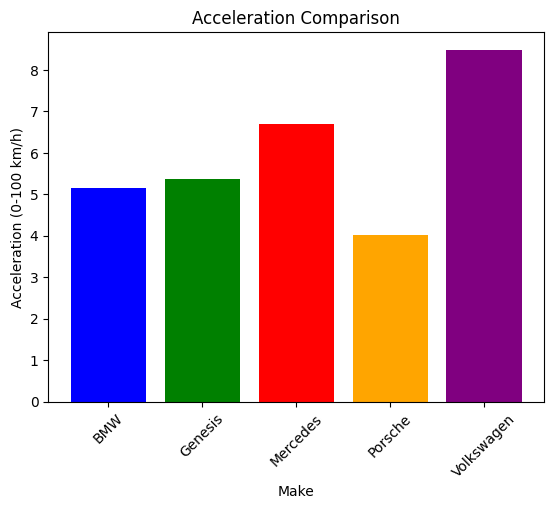

In [ ]:
plt.bar(acceleration_comparison.index, acceleration_comparison.values, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.xlabel('Make')
plt.ylabel('Acceleration (0-100 km/h)')
plt.title('Acceleration Comparison')
plt.xticks(rotation=45)
plt.show()

## Top Speed Comparison


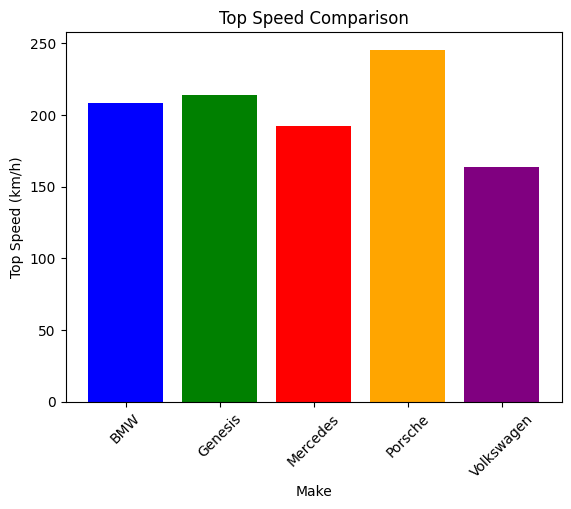

In [ ]:
plt.bar(top_speed_comparison.index, top_speed_comparison.values, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.xlabel('Make')
plt.ylabel('Top Speed (km/h)')
plt.title('Top Speed Comparison')
plt.xticks(rotation=45)
plt.show()


### Battery  Capacity Comparison

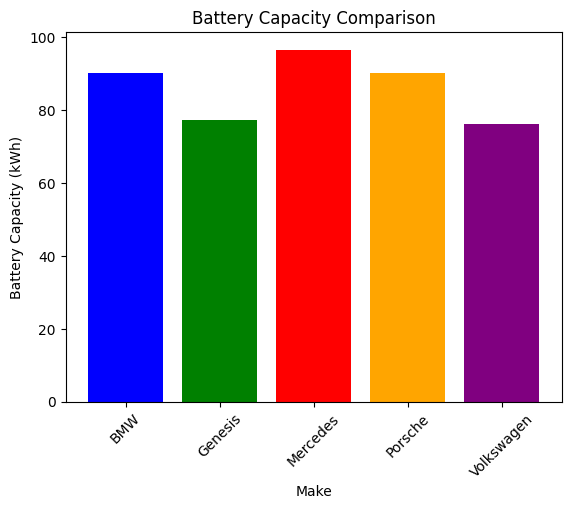

In [ ]:
plt.bar(battery_capacity_comparison.index, battery_capacity_comparison.values, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.xlabel('Make')
plt.ylabel('Battery Capacity (kWh)')
plt.title('Battery Capacity Comparison')
plt.xticks(rotation=45)
plt.show()

##The percentages in the pie chart represent the proportion of the total electric range contributed by each car make. Here's a step-by-step explanation of how the percentages are calculated:

**Data Calculation:** The DataFrame used for the pie chart contains the average electric range for each car make. These average electric range values are calculated by taking the mean of the electric range values for each make.

**Total Electric Range:** The total electric range is the sum of the average electric range values for all the car makes included in the pie chart. This represents the combined electric range of the top 10 car models.

**Percentage Calculation:** To calculate the percentage for each car make, the average electric range for that make is divided by the total electric range and multiplied by 100. This gives the proportion of the total electric range that each car make represents, expressed as a percentage.

**Displaying the Percentages:** In the pie chart, each segment (corresponding to a car make) is labeled with the car make name. The hover information in the chart displays the label (car make) and the percentage of the total electric range that particular make represents.

This provides insights into the market share of electric range among the top 10 car models, showing the significance of each make in terms of their average electric range compared to the overall range available.

In [ ]:
import plotly.express as ps
km_range = pd.DataFrame(df.groupby('Make')['Electric Range'].mean().reset_index()).sort_values(by='Electric Range',ascending=False).reset_index(drop=True).head(10)
km_range.columns = ['model','km_range']
ps.pie(data_frame=km_range, names='model', values='km_range', hover_name='km_range',title='Top 10 Model with KM range',hole=True)


**Variables Considered:**

City - Cold Weather
Highway - Cold Weather
Combined - Cold Weather
City - Mild Weather
Highway - Mild Weather
Combined - Mild Weather
Acceleration 0 - 100 km/h
Top Speed
Electric Range
Total Power
Total Torque
Battery Capacity
Charge Power
Charge Speed
Fastcharge Speed
Length
Width
Height
Wheelbase
Gross Vehicle Weight (GVWR)
Max. Payload
Cargo Volume
Seats
Analysis Used:

**Correlation Analysis:** We calculated the correlation coefficients between the variables to determine the strength and direction of their relationships.
Steps to Reach the Analysis:

**Importing Data: **We imported the dataset containing information on EVs.
**Data Preparation:** We cleaned the data and handled any missing values or inconsistencies.
**Correlation Analysis: **We calculated the correlation coefficients between the variables using a statistical method.
**Interpretation:** We interpreted the correlation coefficients to understand the relationships between the variables.
Final Conclusion:

The analysis revealed the correlations between different variables in the dataset.
Variables such as Electric Range, Battery Capacity, Total Power, and Total Torque showed strong positive correlations, indicating that vehicles with higher electric range tend to have larger battery capacity, total power, and total torque.
Variables related to weather conditions, such as City - Cold Weather and Highway - Cold Weather, showed moderate positive correlations, suggesting that EV performance in cold weather is generally similar across different driving conditions.
Other variables, such as Length, Width, Height, and Wheelbase, showed weak correlations with other variables, indicating that these factors may have less influence on the performance or characteristics of EVs.
The analysis provides insights into the relationships between different variables in the dataset, which can be valuable for understanding the factors affecting EV performance, design, and specifications.
Overall, the case study focused on exploring the correlations between various variables related to EVs. It provided a comprehensive analysis of the dataset and highlighted the significant relationships between different factors. These findings can be used to inform decision-making, design considerations, and further research in the field of electric vehicles.




